# Data Preparation for SpotiScry
### Kwame V. Taylor

## Set up Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acquire the data

Via the csv file Matt has provided with the sample data for now.

In [2]:
df = pd.read_csv('my_spotify.csv', index_col=0)

In [3]:
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,2.0,...,0.351,82.512,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,9.0,...,0.265,148.077,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,0.0,...,0.717,160.011,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,0.0,...,0.771,140.059,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,11.0,...,0.800,160.003,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album


In [4]:
pd.set_option("display.max_colwidth", 10000)

## Use regex to parse album names from data

In [5]:
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,2.0,...,0.351,82.512,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,9.0,...,0.265,148.077,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,0.0,...,0.717,160.011,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,0.0,...,0.771,140.059,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,11.0,...,0.800,160.003,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album


In [6]:
data = {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}], 'external_urls': {'spotify': 'https://open.spotify.com/album/44Ig8dzqOkvkGDzaUof9lK'}, 'href': 'https://api.spotify.com/v1/albums/44Ig8dzqOkvkGDzaUof9lK', 'id': '44Ig8dzqOkvkGDzaUof9lK', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c8a11e48c91a982d086afc69', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c8a11e48c91a982d086afc69', 'width': 64}], 'name': 'Led Zeppelin IV (Deluxe Edition)', 'release_date': '1971-11-08', 'release_date_precision': 'day', 'total_tracks': 16, 'type': 'album', 'uri': 'spotify:album:44Ig8dzqOkvkGDzaUof9lK'}

In [7]:
pd.DataFrame.from_dict(data, orient='index')

,0
album_type,album
artists,"[{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'}, 'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp', 'id': '36QJpDe2go2KgaRleHCDTp', 'name': 'Led Zeppelin', 'type': 'artist', 'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}]"
external_urls,{'spotify': 'https://open.spotify.com/album/44Ig8dzqOkvkGDzaUof9lK'}
href,https://api.spotify.com/v1/albums/44Ig8dzqOkvkGDzaUof9lK
id,44Ig8dzqOkvkGDzaUof9lK
images,"[{'height': 640, 'url': 'https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69', 'width': 640}, {'height': 300, 'url': 'https://i.scdn.co/image/ab67616d00001e02c8a11e48c91a982d086afc69', 'width': 300}, {'height': 64, 'url': 'https://i.scdn.co/image/ab67616d00004851c8a11e48c91a982d086afc69', 'width': 64}]"
name,Led Zeppelin IV (Deluxe Edition)
release_date,1971-11-08
release_date_precision,day
total_tracks,16


This ended up being unnecessary, as we are going to use the playlist features on the API instead.

## Handle null values

In [8]:
df = pd.read_csv('my_spotify.csv', index_col=0)

In [9]:
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,2.0,...,0.351,82.512,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,9.0,...,0.265,148.077,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,0.0,...,0.717,160.011,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,0.0,...,0.771,140.059,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,11.0,...,0.800,160.003,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album


In [10]:
df.isna().sum()

artist              0
album               0
release_date        0
track_name          0
track_id            0
album_popularity    0
label               0
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
instrumentalness    1
liveness            1
valence             1
tempo               1
duration_ms         1
time_signature      1
explicit            0
popularity          0
disc_number         0
track_number        0
album_id            0
album_type          0
dtype: int64

In [11]:
df.artist.value_counts()

Various Artists                132
Lil' Kim                       128
Trina                          122
Nicki Minaj                    109
Missy Elliott                   98
                              ... 
Suga-T                           1
Hipo                             1
Lil Mama                         1
Missy Dee & The Melody Crew      1
mwami                            1
Name: artist, Length: 1475, dtype: int64

In [12]:
df.album.value_counts()

The Notorious K.I.M.                        35
Muthaland                                   24
Stillness In Wonderland (Deluxe Edition)    23
The Naked Truth                             22
Who's Bad                                   22
                                            ..
Broken Feelings                              1
Book III                                     1
SATURATION                                   1
SATURATION III                               1
Errrbody                                     1
Name: album, Length: 3065, dtype: int64

In [13]:
df.danceability.value_counts()

0.814    29
0.797    27
0.880    26
0.765    26
0.755    25
         ..
0.394     1
0.380     1
0.958     1
0.533     1
0.317     1
Name: danceability, Length: 624, dtype: int64

In [14]:
df.energy.value_counts()

0.743    24
0.620    24
0.731    23
0.716    23
0.637    23
         ..
0.389     1
0.221     1
0.188     1
0.379     1
0.241     1
Name: energy, Length: 733, dtype: int64

In [15]:
df.key.value_counts()

1.0     1194
11.0     623
7.0      533
10.0     511
6.0      507
2.0      501
0.0      474
8.0      440
9.0      422
4.0      342
5.0      323
3.0      103
Name: key, dtype: int64

In [16]:
df.loudness.value_counts()

-5.181    7
-5.442    7
-5.288    6
-5.729    5
-6.808    5
         ..
-7.526    1
-2.274    1
-3.158    1
-5.101    1
-8.125    1
Name: loudness, Length: 4274, dtype: int64

In [17]:
df['mode'].value_counts()

1.0    3412
0.0    2561
Name: mode, dtype: int64

In [18]:
df['speechiness'].value_counts()

0.2770    26
0.3000    25
0.2710    25
0.3060    24
0.2870    24
          ..
0.0642     1
0.5070     1
0.6580     1
0.0936     1
0.0789     1
Name: speechiness, Length: 1139, dtype: int64

In [19]:
df['instrumentalness'].value_counts()

0.000000    3607
0.000001       6
0.000001       6
0.000001       6
0.000018       6
            ... 
0.000005       1
0.041500       1
0.000557       1
0.000060       1
0.002510       1
Name: instrumentalness, Length: 1658, dtype: int64

(array([24., 49., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  41.2,  81.4, 121.6, 161.8, 202. , 242.2, 282.4, 322.6,
        362.8, 403. ]),
 <a list of 10 Patch objects>)

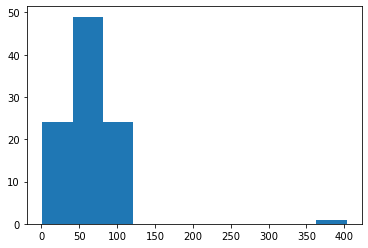

In [20]:
plt.hist(df['popularity'].value_counts())

In [21]:
df.release_date.value_counts()

2004-01-01    74
2006-01-01    64
2020-12-04    60
2001-01-01    59
1999-01-01    59
              ..
2011-05-17     1
2009-09-15     1
1999-07-27     1
2001-09-25     1
2015-09-16     1
Name: release_date, Length: 1462, dtype: int64

## Impute nulls in release date

In [22]:
df['release_date'] = np.where(df['release_date'].str.len()==4, df.release_date.astype(str) + '-01-01', df['release_date'])
df.head()

,artist,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,key,...,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,2.0,...,0.351,82.512,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,9.0,...,0.265,148.077,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,0.0,...,0.717,160.011,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,0.0,...,0.771,140.059,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,11.0,...,0.800,160.003,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album


In [23]:
def handle_nulls(df):
    '''
    This function takes in a DataFrame and returns a DataFrame with the nulls handled.
    Release dates that don't have a month or day are assign a day and month of '01-01'.
    '''
    df['release_date'] = np.where(df['release_date'].str.len()==4, df.release_date.astype(str) + '-01-01', df['release_date'])
    return df


## Fix Tempos

From domain knowledge, I know that computer-detected BPMs (beats per minute) are often incorrectly assessed as twice its actual value.

Fact-checked by searching for the official BPM of tracks higher than 160, here I have automated fixing tempo by halving any tempo that is 170 or above.

Doing this increases the accuracy of the tempo values overall.

In [29]:
#def fix_tempo(df):
#    df.drop(df[df.tempo >= 170].index)    
#    df.loc[df.tempo >= 170] = df.tempo / 2
#    return df

def fix_tempo(df):
    df['tempo'] = np.where(df.tempo >= 170, df.tempo/2, df.tempo)
    return df

# put tempo in second position
second_col = df.pop("tempo")
df.insert(1, "tempo", second_col)
df.drop(df[df.tempo <= 170].index).sort_values(by="tempo", ascending=False)

df = fix_tempo(df)
df

,artist,tempo,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,...,liveness,valence,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
0,Tay-K,82.512,TRAPMAN,2020-07-12,TRAPMAN,6mecZbKK3JDeMdFRNxsCV5,36,Tay-K,0.792,0.594,...,0.2440,0.351,232803.0,4.0,True,43.0,1.0,1.0,2J1hMj78HfdcMrmL2Sk6eR,single
1,Lil Wyte,148.077,Doubt Me Now,2003-03-04,Oxy Cotton,5PtMwNq8Dp31uYdGGacVJE,55,Hypnotize Minds Productions,0.816,0.578,...,0.1140,0.265,193920.0,4.0,True,61.0,1.0,11.0,2lwxcemR1muymEHNMblCpm,album
2,Kamelen,160.011,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,...,0.4090,0.717,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
3,Waka Flocka Flame,140.059,Flockaveli,2010-10-01,Grove St. Party (feat. Kebo Gotti),2e9EZ2V5QGGZPMJacO3y0Y,71,Asylum/Warner Records,0.705,0.702,...,0.3640,0.771,250493.0,4.0,True,62.0,1.0,9.0,6MQtWELG7aRX7CkAzQ6nLM,album
4,Project Pat,160.003,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,...,0.1060,0.800,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Tkay Maidza,106.048,Shook,2020-05-12,Shook,5G9IXRzPaRJssJE76TDenY,26,4AD,0.895,0.791,...,0.3840,0.607,162736.0,4.0,True,33.0,1.0,1.0,5TUlKh4QEavBL1oilV4y86,single
5970,Beyoncé,126.950,The Lion King: The Gift [Deluxe Edition],2020-07-31,MY POWER,0g3zIOFTdkwgJdR48usYgY,73,Parkwood Entertainment/Columbia,0.769,0.856,...,0.1250,0.755,260560.0,4.0,False,61.0,1.0,12.0,7kUuNU2LRmr9XbwLHXU9UZ,album
5971,Shenseea,92.999,The Sidechick Song,2020-03-09,The Sidechick Song,75Z53FMCvlupjHfAh9XgDo,45,Attomatic Records - Romeich Major,0.736,0.615,...,0.4330,0.495,193548.0,4.0,True,52.0,1.0,1.0,0LUbxj9I4VJIVui4m2UGhC,single
5972,Sally Sossa,157.737,100 Flows,2020-10-20,100 Flows,7pXg4n5cOsZvMPsEtemNgz,41,LISTEN TO THE KIDS,0.804,0.679,...,0.1050,0.400,162532.0,3.0,True,48.0,1.0,1.0,7hbT17JOJUM2GbSgoI7wba,single


In [28]:
testing.loc[df.tempo >= 160]

,artist,tempo,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,...,liveness,valence,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
2,Kamelen,160.011,KINGPIN SLIM,2019-11-29,Kingpin O.G - Remix,6s8EhlBn2PIoESylkXnwYc,46,NMG/G-HUSET,0.649,0.798,...,0.409,0.717,254390.0,4.0,True,23.0,1.0,11.0,6va2RTYO2ois7t88RN0LhJ,album
4,Project Pat,160.003,Mista Don't Play: Everythangs Workin',2001-02-13,Don't Save Her (feat. Crunchy Black),3ZRd5Z0fiYtASLdEPPb16m,55,Hypnotize Minds Productions,0.838,0.793,...,0.106,0.800,261933.0,4.0,True,45.0,1.0,5.0,4QzaueQPQa0lqrMmQoh4v0,album
11,Birdman,160.011,Like Father Like Son,2006-01-01,Stuntin' Like My Daddy - Street,3rMyMv8EjKXoPnaRo2hdJN,56,CM/Republic,0.710,0.881,...,0.162,0.809,267293.0,4.0,True,59.0,1.0,3.0,3DLSu5fxSIaG7Ph8G5YVBp,album
23,Boosie Badazz,165.091,Survival Of The Fittest,2007-05-15,"Wipe Me Down (feat. Foxx, Webbie & Lil Boosie) - Remix",6D1CstH1YvzNN8cPd9ay9Q,56,Asylum/Trill Entertainment,0.836,0.906,...,0.227,0.718,272347.0,4.0,True,60.0,1.0,15.0,5ZXga0efPuZJr2KIvN1xZg,album
30,Nelly,164.062,Nellyville,2002-06-25,Air Force Ones,7kAFSrTIOiVZ0gnHBuAH3l,75,Motown,0.784,0.459,...,0.079,0.618,304000.0,4.0,True,61.0,1.0,7.0,4HUUHHXBXImwksfbSPqE7q,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5892,3d Na'tee,163.972,The Regime,2016-08-29,I Go In,7t0YQ2Xj7dvtOr8lV2X2ZI,20,Already Legendary,0.757,0.811,...,0.293,0.451,191053.0,4.0,True,4.0,1.0,19.0,7GP7biRYhJMb1AmD8jRHzR,album
5910,Yani Mo,160.045,The Moment,2017-07-15,Saucony,5AKcztfsL5l6xmb54kAUkA,8,Bored Azz Productions,0.815,0.590,...,0.179,0.444,239568.0,4.0,True,8.0,1.0,2.0,6i7En8qUsnZ1B4QDLWjMHj,album
5920,Rico Nasty,160.090,Big Dick Energy,2018-07-23,Big Dick Energy,7GFRxsRFuaSgPBxvYnrYDL,37,Sugar Trap,0.812,0.837,...,0.163,0.436,144222.0,4.0,True,44.0,1.0,1.0,6EfgoWAi9aTkmQwEI3tFwK,single
5924,Tommy Genesis,168.067,100 Bad (Charli XCX Remix),2018-09-07,100 Bad - Charli XCX Remix,63p9yxFQwnJr5wrwPnfuRp,0,Downtown Records,0.731,0.646,...,0.080,0.667,178603.0,4.0,True,0.0,1.0,1.0,3O5E0LBKCS0eQXCznmU39e,single


I noticed that there are also a lot of tracks with BPM lower than 90. I have a hunch that some of these might be half of their actual BPM.

I will use Google and Tunebat to manually determine where to make the cut-off for automating fixing the tempo of tracks on the lower end of BPM.

In [31]:
df.loc[df.tempo <= 80]

,artist,tempo,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,...,liveness,valence,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
5,Waka Flocka Flame,71.544,Flockaveli,2010-10-01,Hard in Da Paint,3XQY8kDjI8LARMIC9xkxQk,71,Asylum/Warner Records,0.611,0.660,...,0.3650,0.583,246387.0,4.0,True,65.0,1.0,2.0,6MQtWELG7aRX7CkAzQ6nLM,album
20,Young Dro,75.973,Best Thang Smokin' (Explicit Version),2006-06-27,Shoulder Lean (feat. T.I.),2OqYarizUUGzSSNHPrDEii,52,Grand Hustle/Atlantic,0.700,0.518,...,0.1000,0.542,258680.0,4.0,True,57.0,1.0,4.0,4UZzO6rBo6wjM2zfuRgd3r,album
22,David Banner,60.896,The Greatest Story Ever Told,2008-01-01,Get Like Me,2IBF9lQ9lgVai8LkskI5L7,53,SRC Records,0.609,0.751,...,0.2280,0.653,224547.0,3.0,True,57.0,1.0,6.0,4dlnbBnFH9CE6sbyrPP2aR,album
32,Dem Franchize Boyz,76.035,On Top Of Our Game,2006-01-01,"Lean Wit It, Rock Wit It",7cVmKBwzPsh4Fmb6SplfEm,55,Virgin Records,0.886,0.620,...,0.1000,0.600,229813.0,4.0,True,60.0,1.0,6.0,0e0ks1xlvQBOsC3Gsw2EgA,album
35,Trillville,78.021,Neva Eva,2003-09-02,Neva Eva (feat. Lil Scrappy & Lil Jon),6QwwsJC57SitPcWuyEpuwd,40,Warner Records,0.777,0.810,...,0.0861,0.787,276320.0,4.0,True,47.0,1.0,1.0,45NgLRLbEPJ4xcxXnREao0,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,Rocky Rivera,73.481,Nom de Guerre,2015-06-30,Pussy Kills,2MqTvG3DxHeYyltkSilJxD,21,Beatrock Music LLC,0.747,0.481,...,0.9110,0.431,232716.0,4.0,True,19.0,1.0,1.0,5qByEOI2odxa5GxTmWZV29,single
5905,Various Artists,77.003,Insecure: Music from the HBO Original Series,2016-12-16,Broken Pussy,1IWzr4t0ymLCo8CkQ8q5oc,42,RCA Records Label,0.887,0.405,...,0.0959,0.630,80800.0,4.0,False,25.0,1.0,2.0,768HEXhXFM0O8cP2ObI3RA,compilation
5918,Nyemiah Supreme,77.443,Do Better,2018-06-22,Do Better,3ycC2hFCTYCU49fYSl8kCJ,7,Ambitious Minds,0.708,0.722,...,0.1770,0.673,161672.0,4.0,True,12.0,1.0,1.0,1qKDZkLtgKhJKHEpTNJrjM,single
5936,Killumantii,75.525,Red Down,2018-07-27,Red Down,2XL5shxCODG3t6b40r52xs,34,Generation Now/Atlantic,0.771,0.677,...,0.2810,0.488,155336.0,4.0,True,41.0,1.0,1.0,3YxKh5h0g4csyr9kUUpsKW,single


So far Hard in Da Paint and Shoulder Lean have accurate tempos.

Since it doesn't actually seem abnormal to have a BPM around 75 in Hip Hop, I'll just look at songs under 70 now.

In [35]:
df.loc[df.tempo < 70]

,artist,tempo,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,...,liveness,valence,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
22,David Banner,60.896,The Greatest Story Ever Told,2008-01-01,Get Like Me,2IBF9lQ9lgVai8LkskI5L7,53,SRC Records,0.609,0.751,...,0.2280,0.653,224547.0,3.0,True,57.0,1.0,6.0,4dlnbBnFH9CE6sbyrPP2aR,album
40,Hurricane Chris,60.709,A Bay Bay,2007-06-19,A Bay Bay,6MnFB3qurhmGs1xdjrz5Bg,46,J Records,0.577,0.668,...,0.0924,0.702,257120.0,3.0,False,53.0,1.0,1.0,461UiTpF7jyEZN42oEOS5w,single
614,Big Moe,65.161,The Best of Big Moe,2007-12-18,Barre Baby,0R1YEEVxFIf8X3x7SyAQ5C,0,BCD Music Group,0.789,0.436,...,0.3610,0.851,179027.0,4.0,False,0.0,1.0,3.0,5OFUfNL9OXBloIaJR0thH8,compilation
1166,GoldLink,51.539,"And After That, We Didn't Talk",2015-11-06,Late Night (feat. Masego),60ZZNXIdwgUGkVGRt7foLT,57,Soulection,0.442,0.446,...,0.3080,0.295,161080.0,4.0,True,59.0,1.0,6.0,3tlDQco8P9HFoR5CRC1BCj,album
1355,XXXTENTACION,64.934,?,2018-03-16,changes,7AFASza1mXqntmGtbxXprO,91,"Bad Vibes Forever, LLC",0.669,0.308,...,0.0984,0.520,121887.0,4.0,False,85.0,1.0,15.0,2Ti79nwTsont5ZHfdxIzAm,album
1958,6LACK,68.580,FREE 6LACK,2016-11-18,PRBLMS,4AtZRwSR8BOTTQg5ihSggt,74,LVRN Records,0.417,0.580,...,0.1790,0.139,246773.0,5.0,True,74.0,1.0,3.0,7iwGw8ob3YLqZrbKzGFnHi,album
2153,DJ Self,67.445,I Be About It (Explicit & Radio Edit),2014-07-24,I Be About It - Gwinin Mix,60BNWIwulIy2UynnAzzqP1,0,Gwinin Music,0.713,0.611,...,0.4990,0.503,336000.0,4.0,True,0.0,1.0,1.0,7HbaFTvB0cBCY5kJTPuI4R,single
2209,Slick Rick,68.444,Best Of,2014-05-27,Children's Story,311MkelnCwIeMdnn2auwLh,32,Def Jam Recordings,0.600,0.453,...,0.3430,0.720,239053.0,5.0,True,28.0,1.0,1.0,4EUrQ7Trx4OuPxXWIn3MMk,compilation
2766,Killstation,65.919,Extinction,2018-03-17,Extinction,3nF5bxOE63ZU6JiU4IJQB8,59,Killstation,0.549,0.497,...,0.0698,0.113,84558.0,3.0,False,66.0,1.0,1.0,1cHjeZr7vrhqjnymoHJm4x,single
2879,Busta Rhymes,68.938,Touch It Remixes,2005-01-01,"Touch It - Remix/Featuring Mary J. Blige, Rah Digga, Missy Elliot, Lloyd Banks, Papoose & DMX (Edited)",7HiUa9Gkk3QddHWT4jKiXd,44,Aftermath,0.641,0.615,...,0.1050,0.411,240147.0,3.0,False,50.0,1.0,4.0,6kd4U67lfaBm2QAWdMh0iC,single


I had to use an extra source (https://songbpm.com/), but so far Get Like Me has a BPM that was halved in the data.

Ay Bay Bay, by most reports, has an accurate BPM of 60.7 in this dataset, although one did give it a BPM of 155. However, when I gave the song a listen just now to count the beats myself, I noticed that it would make more sense for the song to have a very slow BPM.

Give this information, I do believe a lot of tracks have a similar BPM, so next I'll just look at anything 55 and lower.

In [36]:
df.loc[df.tempo <= 55]

,artist,tempo,album,release_date,track_name,track_id,album_popularity,label,danceability,energy,...,liveness,valence,duration_ms,time_signature,explicit,popularity,disc_number,track_number,album_id,album_type
1166,GoldLink,51.539,"And After That, We Didn't Talk",2015-11-06,Late Night (feat. Masego),60ZZNXIdwgUGkVGRt7foLT,57,Soulection,0.442,0.446,...,0.308,0.295,161080.0,4.0,True,59.0,1.0,6.0,3tlDQco8P9HFoR5CRC1BCj,album
3719,Shawnna,0.000,Worth Tha Weight,2004-01-01,Money Mike (Skit),1lZWbmo1z6aSWEClUbljTq,26,RAL (Rush Associated Label),0.000,0.295,...,0.610,0.000,13853.0,0.0,True,0.0,1.0,4.0,1HgNMKdHdLed9wxujHytYf,album
4034,BbyMutha,35.491,BbyShoe,2018-02-22,MOM and Kids,33a8gQTmjPLySYO2ygnJtr,32,SmokeOuts Music,0.834,0.165,...,0.241,0.673,45070.0,3.0,True,12.0,1.0,5.0,6mRJoLxbaQRTSULMr7Mlw8,album
4047,BbyMutha,33.780,Muthaleficent,2020-02-27,Intro,4NYu7lX2ee6el8ahQxYDJT,36,the muthaboard,0.640,0.460,...,0.244,0.233,90504.0,3.0,True,15.0,1.0,1.0,3G8bCmjtckFbrCzHGx6uTt,album
5038,Charli Baltimore,44.451,Cold As Ice,1999-06-22,Wake Up Bitch (Interlude),6Op8OAAzNyCbsZ2nfCAMHq,21,Untertainment,0.601,0.267,...,0.955,0.675,36533.0,3.0,False,1.0,1.0,18.0,6MZesTNMkraV9NpJ7ipFw8,album
5235,Saiah,35.892,Non Binary,2020-12-04,3NIGHTS,6r3BLN5CkdMMzrTFtodfpS,43,No Name Records LLC,0.316,0.586,...,0.414,0.434,136941.0,3.0,True,49.0,1.0,4.0,2juStrhlUC4xSS6gWVINTP,single
5252,Phora,54.718,Destiny's Song,2020-09-04,Destiny's Song,6xRsvyeB6omCCYdl7QSZes,53,Phora LLC,0.642,0.400,...,0.381,0.357,161067.0,4.0,True,60.0,1.0,1.0,1EkLZjupNkyUjcZ7aon07W,single


Honestly there are not enough obversations here for me to be concerned looking into the low end any further.

My work fixing the tempos is done.